**Group 3 BSCS 2A**

Azzaleah Faith Oxina

Betina Grace Lat

Sean Denmark Terencio

Rjay Llamanzares

Randy Mojer

Jov Matthew Luna

In [93]:
import pandas as pd #Data Manipulation
import matplotlib.pyplot as plt #Data Visualization
import matplotlib.dates as mdates

In [94]:
data = pd.read_csv('/content/Visitor_Logs.csv', encoding ='latin-1')
da = pd.read_csv('/content/Security_Camera_Logs.csv', encoding ='latin-1')
dt = pd.read_csv('/content/Inventory_Records.csv', encoding ='latin-1')
dat = pd.read_csv('/content/Email_Exchanges.csv', encoding ='latin-1')


Visitors Logs

In [95]:
data['Date'] = pd.to_datetime(data['Date'])
data['Entry Time'] = pd.to_datetime(data['Entry Time'], format='%I:%M %p')
data['Exit Time'] = pd.to_datetime(data['Exit Time'], format='%I:%M %p')


In [96]:
data['Visit Duration'] = data['Exit Time'] - data['Entry Time']

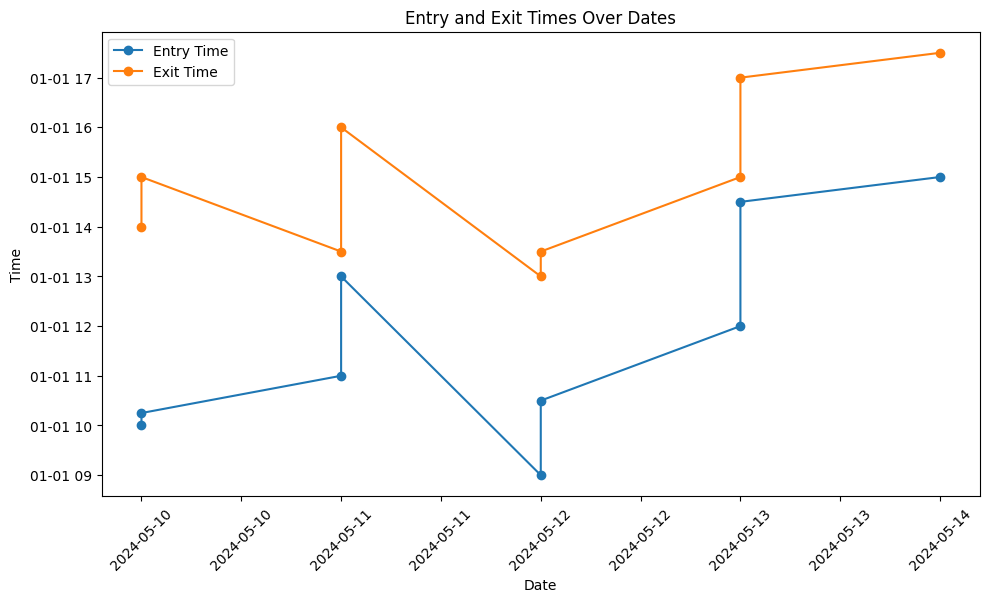

In [97]:
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Entry Time'],  label='Entry Time', marker='o')
plt.plot(data['Date'], data['Exit Time'],  label='Exit Time', marker='o')
plt.title('Entry and Exit Times Over Dates')
plt.xlabel('Date')
plt.ylabel('Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter("%Y-%m-%d"))
plt.show()

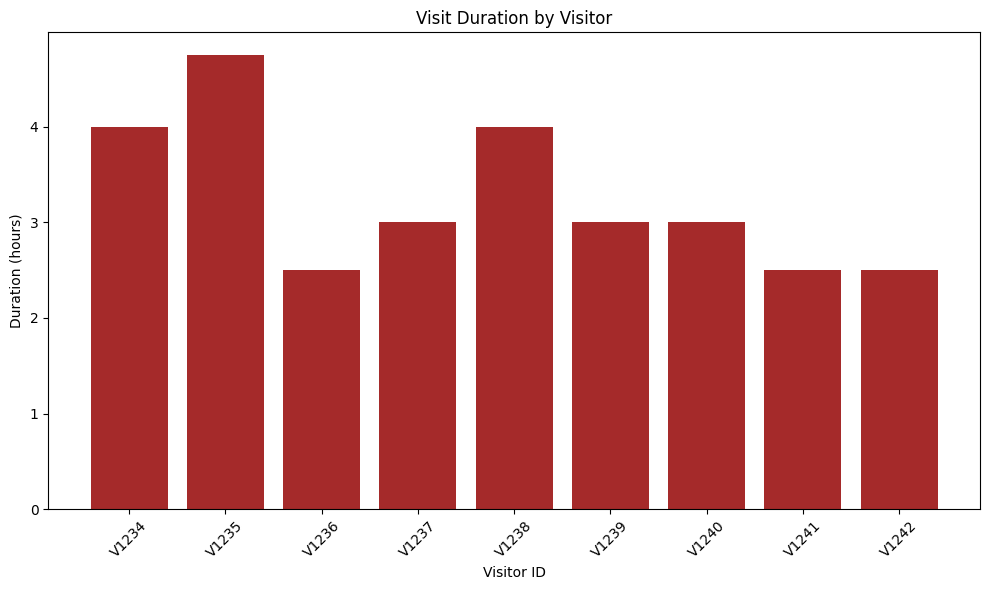

In [98]:
plt.figure(figsize=(10, 6))
plt.bar(data['Visitor ID'], data['Visit Duration'].dt.total_seconds() / 3600, color='brown')
plt.title('Visit Duration by Visitor')
plt.xlabel('Visitor ID')
plt.ylabel('Duration (hours)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Security Camera Logs


In [99]:
da['Timestamp'] = pd.to_datetime(da['Timestamp'])

In [100]:
movement_counts = da['Detected Movement'].value_counts()

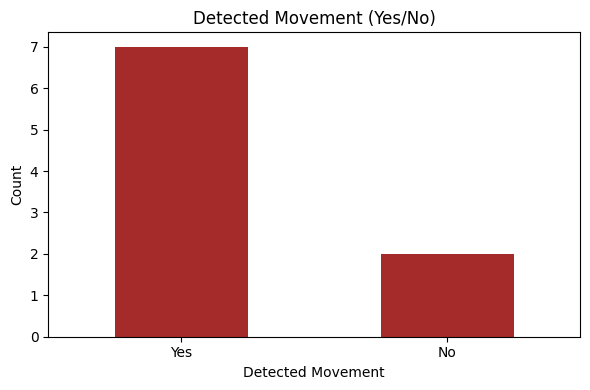

In [101]:
plt.figure(figsize=(6, 4))
movement_counts.plot(kind='bar', color='brown')
plt.title('Detected Movement (Yes/No)')
plt.xlabel('Detected Movement')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [102]:
print("\nNotable Observations:")
for observation in da['Notable Observations']:
    print(observation)


Notable Observations:
Shadowy figure spotted
-
Visitor lingered unusually long
Suspicious behavior observed
Group entered
Unattended bag spotted
-
Visitor taking photos
Visitor avoided cameras


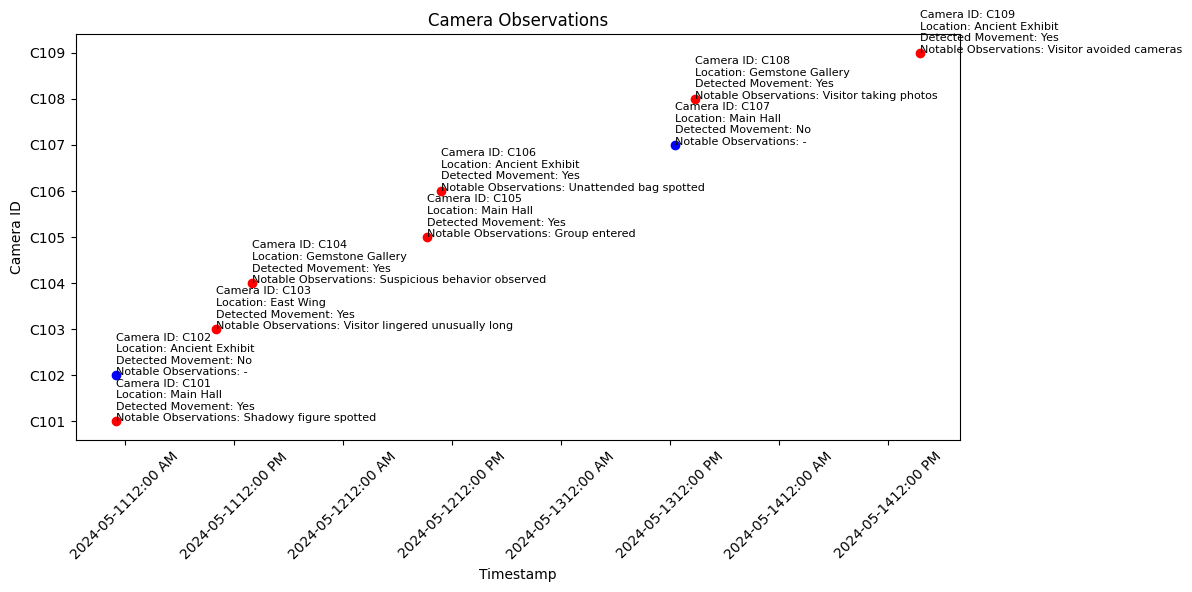

In [103]:
plt.figure(figsize=(12, 6))
for idx, row in da.iterrows():
    if row['Detected Movement'] == 'Yes':
        plt.scatter(row['Timestamp'], row['Camera ID'], color='red', label='Detected Movement')
    else:
        plt.scatter(row['Timestamp'], row['Camera ID'], color='blue')
    plt.text(row['Timestamp'], row['Camera ID'], f"Camera ID: {row['Camera ID']}\nLocation: {row['Location']}\nDetected Movement: {row['Detected Movement']}\nNotable Observations: {row['Notable Observations']}",
             fontsize=8, color='black')
plt.xlabel('Timestamp')
plt.ylabel('Camera ID')
plt.title('Camera Observations')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d%I:%M %p'))
plt.tight_layout()
plt.show()

Inventory Records

In [104]:
dt['Movement Date'] = pd.to_datetime(dt['Movement Date'])

In [105]:
location_counts = dt['Last Known Location'].value_counts()

In [106]:
suspicious_relocation = dt[dt['Description'] == 'Sculpture']['Last Known Location']
disappearance_date = dt[dt['Description'] == 'Sculpture']['Movement Date'].max()

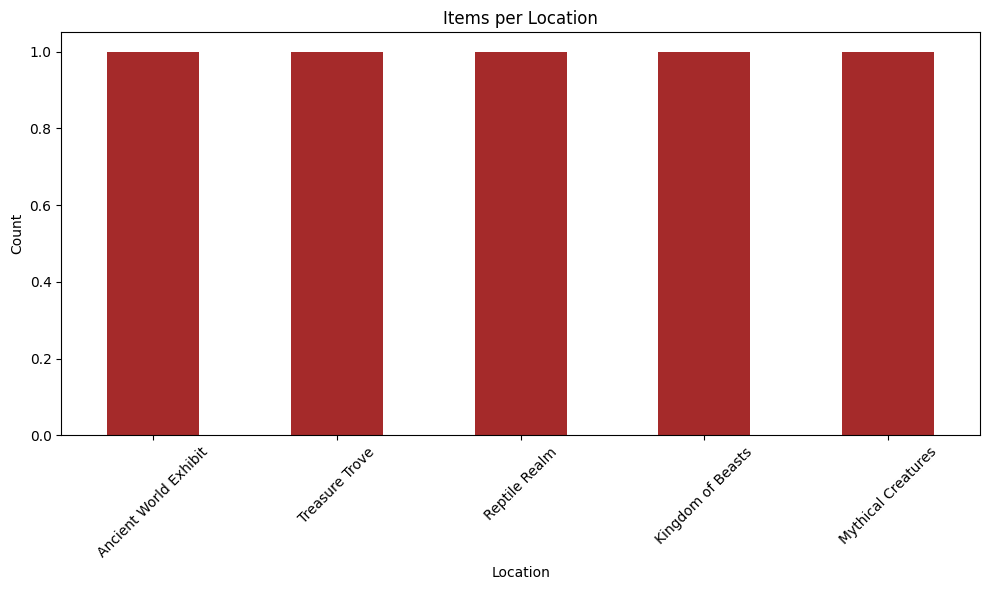

In [107]:
plt.figure(figsize=(10, 6))
location_counts.plot(kind='bar', color='brown')
plt.title('Items per Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [108]:
print("\nAuthorized Personnel:")
print(dt['Authorized Personnel'].unique())


Authorized Personnel:
['John Doe' 'Jane Smith' 'Emily White' 'Michael Brown' 'Olivia Green']


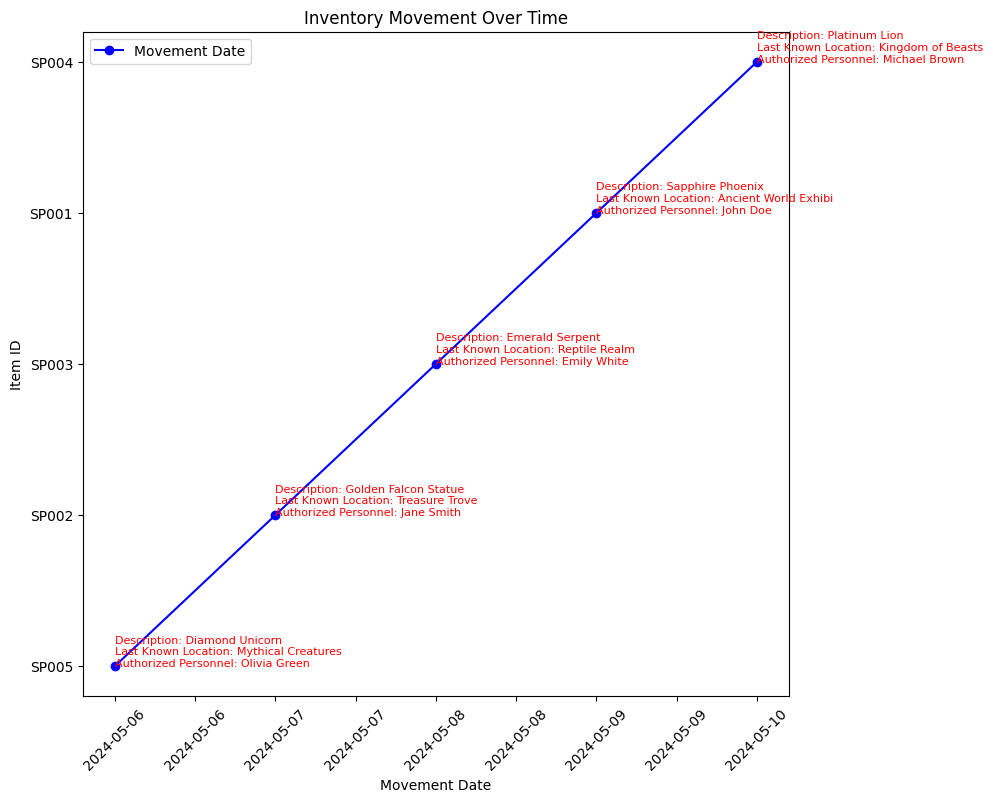

In [109]:
dt.sort_values(by='Movement Date', inplace=True)
plt.figure(figsize=(10, 8))
plt.plot(dt['Movement Date'], dt['Item ID'], marker='o', linestyle='-', color='blue', label='Movement Date')
for idx, row in dt.iterrows():
    description = row['Description'][:30]
    location = row['Last Known Location'][:20]
    personnel = row['Authorized Personnel'][:20]
    plt.text(row['Movement Date'], row['Item ID'], f"Description: {description}\nLast Known Location: {location}\nAuthorized Personnel: {personnel}",
             fontsize=8, color='red')
plt.xlabel('Movement Date')
plt.ylabel('Item ID')
plt.title('Inventory Movement Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter("%Y-%m-%d"))
plt.show()

Email Exchanges

In [110]:
dat['Date'] = pd.to_datetime(dat['Date'])

In [111]:
dat.sort_values(by='Date', inplace=True)

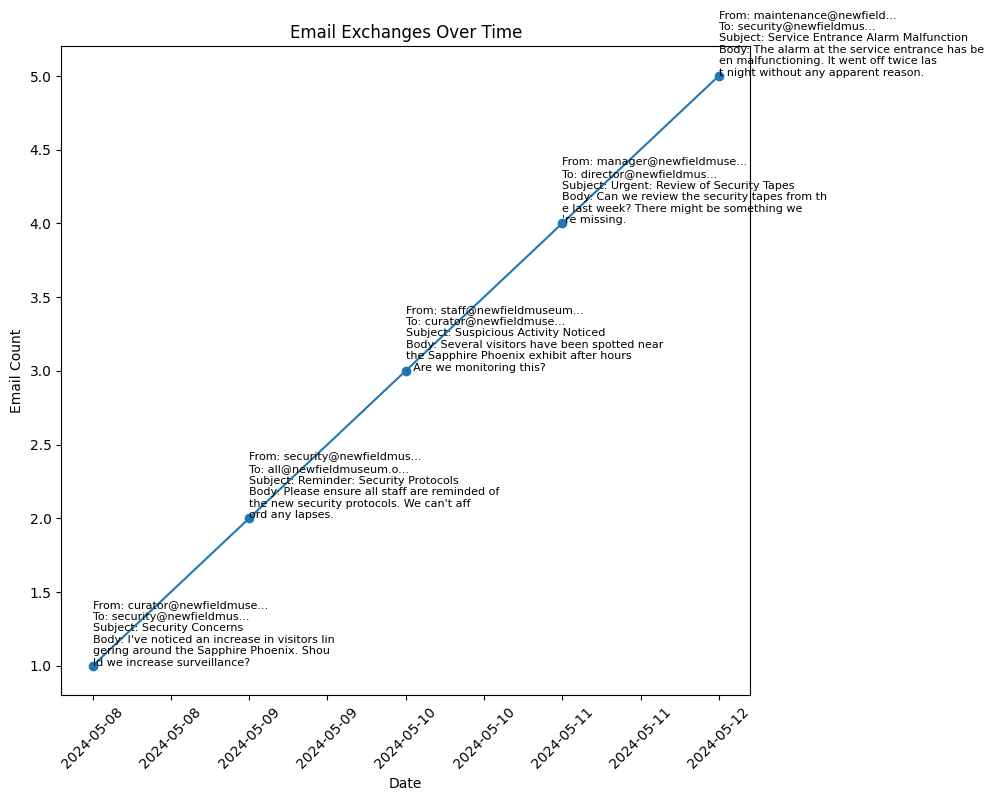

In [112]:
plt.figure(figsize=(10, 8))
plt.plot(dat['Date'], range(1, len(dat) + 1), marker='o', linestyle='-')
ax = plt.gca()
for idx, row in dat.iterrows():
    subject = (row['Subject'][:40] + '...') if len(row['Subject']) > 40 else row['Subject']
    to = (row['To'][:20] + '...') if len(row['To']) > 20 else row['To']
    from_ = (row['From'][:20] + '...') if len(row['From']) > 20 else row['From']
    body_lines = [row['Body'][i:i+40] for i in range(0, len(row['Body']), 40)]
    body = '\n'.join(body_lines)
    ax.text(row['Date'], idx + 1, f"From: {from_}\nTo: {to}\nSubject: {subject}\nBody: {body}", fontsize=8, color='black')
plt.xlabel('Date')
plt.ylabel('Email Count')
plt.title('Email Exchanges Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter("%Y-%m-%d"))
plt.show()